/var/folders/ll/vxy029dd3r5fz2ld21kdy8dw0000gn/T/ipykernel_45637/1352807592.py:22: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall)/(precision + recall)


Best Threshold=0.457176, F-Score=nan
precision=array([0.21698113, 0.20952381, 0.20192308, 0.2038835 , 0.20588235,
       0.20792079, 0.21      , 0.21212121, 0.21428571, 0.21649485,
       0.21875   , 0.22105263, 0.22340426, 0.21505376, 0.2173913 ,
       0.20879121, 0.21111111, 0.21348315, 0.20454545, 0.20689655,
       0.20930233, 0.21176471, 0.21428571, 0.21686747, 0.2195122 ,
       0.22222222, 0.2125    , 0.21518987, 0.21794872, 0.22077922,
       0.22368421, 0.22666667, 0.22972973, 0.23287671, 0.23611111,
       0.23943662, 0.22857143, 0.23188406, 0.23529412, 0.23880597,
       0.24242424, 0.24615385, 0.25      , 0.25396825, 0.25806452,
       0.24590164, 0.25      , 0.25423729, 0.25862069, 0.26315789,
       0.26785714, 0.27272727, 0.27777778, 0.28301887, 0.28846154,
       0.29411765, 0.3       , 0.30612245, 0.3125    , 0.29787234,
       0.30434783, 0.28888889, 0.29545455, 0.30232558, 0.30952381,
       0.31707317, 0.325     , 0.33333333, 0.34210526, 0.35135135,
       0.333333

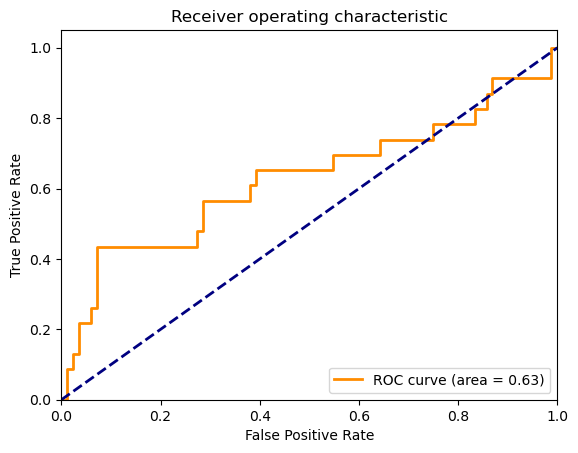

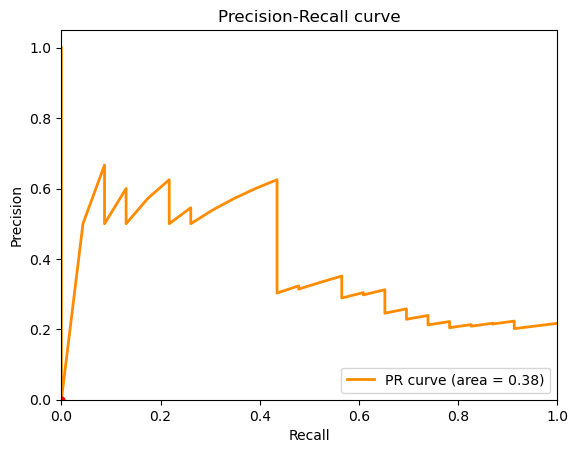

roc_auc=0.6278467908902692
pr_auc=0.37640322747395716
0.0
0.0
[1.         0.95652174 0.91304348 0.91304348 0.91304348 0.91304348
 0.91304348 0.91304348 0.91304348 0.91304348 0.91304348 0.91304348
 0.91304348 0.86956522 0.86956522 0.82608696 0.82608696 0.82608696
 0.7826087  0.7826087  0.7826087  0.7826087  0.7826087  0.7826087
 0.7826087  0.7826087  0.73913043 0.73913043 0.73913043 0.73913043
 0.73913043 0.73913043 0.73913043 0.73913043 0.73913043 0.73913043
 0.69565217 0.69565217 0.69565217 0.69565217 0.69565217 0.69565217
 0.69565217 0.69565217 0.69565217 0.65217391 0.65217391 0.65217391
 0.65217391 0.65217391 0.65217391 0.65217391 0.65217391 0.65217391
 0.65217391 0.65217391 0.65217391 0.65217391 0.65217391 0.60869565
 0.60869565 0.56521739 0.56521739 0.56521739 0.56521739 0.56521739
 0.56521739 0.56521739 0.56521739 0.56521739 0.52173913 0.47826087
 0.47826087 0.43478261 0.43478261 0.43478261 0.43478261 0.43478261
 0.43478261 0.43478261 0.43478261 0.43478261 0.43478261 0.43478261
 

In [20]:
import pandas as pd
import pathlib
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np
# https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used 

csv_file = pathlib.Path('/Users/eugene/OneDrive - Nexus365/PhD/4. Rotation 2/panddascore/training_results/2022_09_15-04_57_21_PM}/output_labels.csv')
csv_file = pathlib.Path('/dls/labxchem/data/2018/lb18145-80/processing/analysis/eugene/pandda_score/training_results/2022_09_20-07_29_42_PM/output_labels.csv')

df = pd.read_csv(csv_file)
pred_probabilities = df['pred_probabilities'].tolist()
df_ground_truth_labels = df['labels_remodelled_yes_no'].tolist()

fpr, tpr, thresholds = roc_curve(df_ground_truth_labels, pred_probabilities)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(df_ground_truth_labels, pred_probabilities)
pr_auc = auc(recall, precision)

# Optimum thresold — optimise F-measure
fscore = (2 * precision * recall)/(precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

print(f'{precision=}')
#plot roc curves
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#plot precision recall curves
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.plot(recall[2724], precision[2724], marker='o', markersize=5, color="red", label='optimum threshold = %0.2f' %thresholds[2724])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

print(f'{roc_auc=}')
print(f'{pr_auc=}')

print(precision)
print(sum(recall>0.95))
print(recall[2724])
print(thresholds[2724])
